In [137]:
import pandas as pd

In [138]:
df = pd.read_csv('postings.csv')

In [139]:
df.head()

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,NaN,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,NaN,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0


In [140]:
df.shape

(123849, 31)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123849 entries, 0 to 123848
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   job_id                      123849 non-null  int64  
 1   company_name                122130 non-null  object 
 2   title                       123849 non-null  object 
 3   description                 123842 non-null  object 
 4   max_salary                  29793 non-null   float64
 5   pay_period                  36073 non-null   object 
 6   location                    123849 non-null  object 
 7   company_id                  122132 non-null  float64
 8   views                       122160 non-null  float64
 9   med_salary                  6280 non-null    float64
 10  min_salary                  29793 non-null   float64
 11  formatted_work_type         123849 non-null  object 
 12  applies                     23320 non-null   float64
 13  original_liste

Based on this data, we can predict salary. This is a regression problem.

The salary will be predicted based on the location, number of views, formatted work type, remote work availability, type of application, and formatted experience level.

In [142]:
df.describe()

,job_id,max_salary,company_id,views,med_salary,min_salary,applies,original_listed_time,remote_allowed,expiry,closed_time,listed_time,sponsored,normalized_salary,zip_code,fips
count,1.238490e+05,2.979300e+04,1.221320e+05,122160.000000,6280.000000,2.979300e+04,23320.000000,1.238490e+05,15246.0,1.238490e+05,1.073000e+03,1.238490e+05,123849.0,3.607300e+04,102977.000000,96434.000000
mean,3.896402e+09,9.193942e+04,1.220401e+07,14.618247,22015.619876,6.491085e+04,10.591981,1.713152e+12,1.0,1.716213e+12,1.712928e+12,1.713204e+12,0.0,2.053270e+05,50400.491887,28713.879887
std,8.404355e+07,7.011101e+05,2.554143e+07,85.903598,52255.873846,4.959738e+05,29.047395,4.848209e+08,0.0,2.321394e+09,3.622893e+08,3.989122e+08,0.0,5.097627e+06,30252.232515,16015.929825
min,9.217160e+05,1.000000e+00,1.009000e+03,1.000000,0.000000,1.000000e+00,1.000000,1.701811e+12,1.0,1.712903e+12,1.712346e+12,1.711317e+12,0.0,0.000000e+00,1001.000000,1003.000000
25%,3.894587e+09,4.828000e+01,1.435200e+04,3.000000,18.940000,3.700000e+01,1.000000,1.712863e+12,1.0,1.715481e+12,1.712670e+12,1.712886e+12,0.0,5.200000e+04,24112.000000,13121.000000
50%,3.901998e+09,8.000000e+04,2.269650e+05,4.000000,25.500000,6.000000e+04,3.000000,1.713395e+12,1.0,1.716042e+12,1.712670e+12,1.713408e+12,0.0,8.150000e+04,48059.000000,29183.000000
75%,3.904707e+09,1.400000e+05,8.047188e+06,8.000000,2510.500000,1.000000e+05,8.000000,1.713478e+12,1.0,1.716088e+12,1.713283e+12,1.713484e+12,0.0,1.250000e+05,78201.000000,42077.000000
max,3.906267e+09,1.200000e+08,1.034730e+08,9975.000000,750000.000000,8.500000e+07,967.000000,1.713573e+12,1.0,1.729125e+12,1.713562e+12,1.713573e+12,0.0,5.356000e+08,99901.000000,56045.000000


In [143]:
df.columns

Index(['job_id', 'company_name', 'title', 'description', 'max_salary',
       'pay_period', 'location', 'company_id', 'views', 'med_salary',
       'min_salary', 'formatted_work_type', 'applies', 'original_listed_time',
       'remote_allowed', 'job_posting_url', 'application_url',
       'application_type', 'expiry', 'closed_time',
       'formatted_experience_level', 'skills_desc', 'listed_time',
       'posting_domain', 'sponsored', 'work_type', 'currency',
       'compensation_type', 'normalized_salary', 'zip_code', 'fips'],
      dtype='object')

In [144]:
sub_df = df[['views', 'formatted_work_type', 'remote_allowed', 'application_type', 'formatted_experience_level', 'max_salary']].copy()

In [145]:
sub_df.shape

(123849, 6)

In [146]:
sub_df.isna().sum()

views                           1689
formatted_work_type                0
remote_allowed                108603
application_type                   0
formatted_experience_level     29409
max_salary                     94056
dtype: int64

In [147]:
sub_df['formatted_experience_level'].unique()

array([nan, 'Entry level', 'Mid-Senior level', 'Associate', 'Director',
       'Internship', 'Executive'], dtype=object)

In [148]:
sub_df['views'] = sub_df['views'].fillna(sub_df['views'].mean())
sub_df['remote_allowed'] = sub_df['remote_allowed'].fillna(0).astype(int)
sub_df['formatted_experience_level'] = sub_df['formatted_experience_level'].fillna('Any')

In [149]:
sub_df.isna().sum()

views                             0
formatted_work_type               0
remote_allowed                    0
application_type                  0
formatted_experience_level        0
max_salary                    94056
dtype: int64

In [150]:
sub_df.head()

,views,formatted_work_type,remote_allowed,application_type,formatted_experience_level,max_salary
0,20.0,Full-time,0,ComplexOnsiteApply,Any,20.0
1,1.0,Full-time,0,ComplexOnsiteApply,Any,50.0
2,8.0,Full-time,0,ComplexOnsiteApply,Any,65000.0
3,16.0,Full-time,0,ComplexOnsiteApply,Any,175000.0
4,3.0,Full-time,0,ComplexOnsiteApply,Any,80000.0


In [151]:
import seaborn as sns

<Axes: xlabel='formatted_work_type', ylabel='count'>

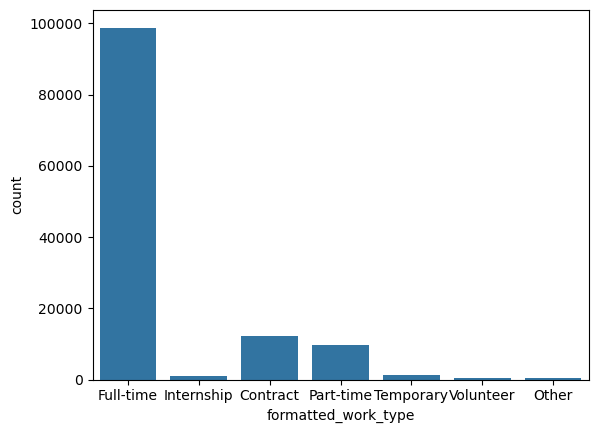

In [152]:
sns.countplot(x='formatted_work_type', data=sub_df)

<Axes: xlabel='application_type', ylabel='count'>

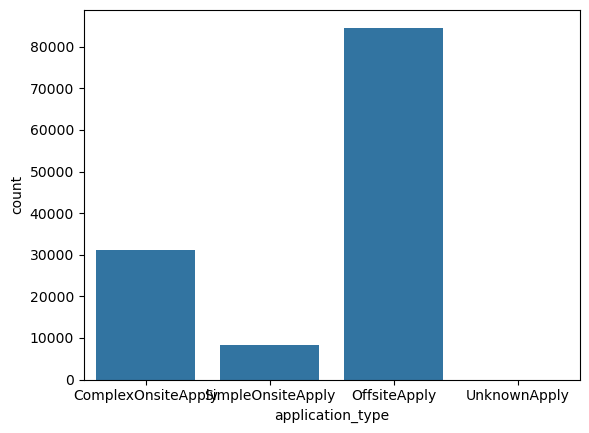

In [153]:
sns.countplot(x='application_type', data=sub_df)

<Axes: xlabel='application_type', ylabel='views'>

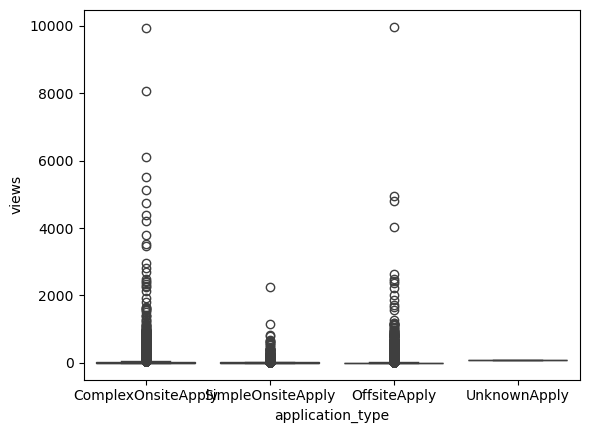

In [154]:
sns.boxplot(x='application_type', y='views', data=sub_df)

<Axes: xlabel='formatted_experience_level', ylabel='count'>

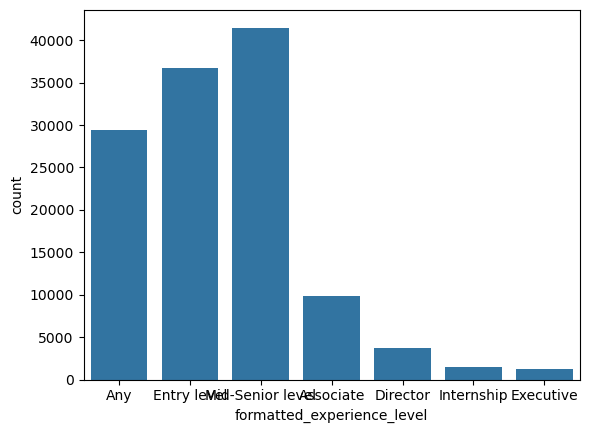

In [155]:
sns.countplot(x='formatted_experience_level', data=sub_df)

In [112]:
sub_df['formatted_experience_level'].unique()

array(['Any', 'Entry level', 'Mid-Senior level', 'Associate', 'Director',
       'Internship', 'Executive'], dtype=object)

In [156]:
sub_df = pd.get_dummies(sub_df, columns=[
    'formatted_work_type',
    'application_type',
    'formatted_experience_level'
], drop_first=True)


In [160]:
sub_df.head()

,views,remote_allowed,max_salary,formatted_work_type_Full-time,formatted_work_type_Internship,formatted_work_type_Other,formatted_work_type_Part-time,formatted_work_type_Temporary,formatted_work_type_Volunteer,application_type_OffsiteApply,application_type_SimpleOnsiteApply,application_type_UnknownApply,formatted_experience_level_Associate,formatted_experience_level_Director,formatted_experience_level_Entry level,formatted_experience_level_Executive,formatted_experience_level_Internship,formatted_experience_level_Mid-Senior level
0,20.0,0,20.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1.0,0,50.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,8.0,0,65000.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,16.0,0,175000.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,3.0,0,80000.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [157]:
X = sub_df.drop('max_salary', axis=1)

In [158]:
y = sub_df['max_salary']

In [159]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)